In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [12]:
data = pd.read_csv("H:\FantasyMachineLearning\FantasyFootballMachineLearning\FantasyFootballData.csv")
data = data.fillna(0)

In [23]:
subset = data.drop(columns = ['Year', 'Name', 'Team', 'Passing Yds', 'Passing TD', 'Passing Int',
       'Rushing Yds', 'Rushing TD', 'Receiving Yds', 
       'Receiving TD', 'PPR', 'Fantasy Rank'])
y = subset['Points']
x = subset.drop(columns = ['Position','Points'])

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 88)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=88)

In [47]:
# Calculated Predictions Based on Random Forest
predictions = rf.predict(x_test)
# Difference between Predicted and Actual
errors = abs(predictions - y_test)
# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,predictions))
# Mean Absolute Error
mae = round(np.mean(errors), 2)
# Mean Absolute Percent Error
mape = 100 * (errors / y_test)
# Accuracy of Random Forest
accuracy = 100 - np.mean(mape)

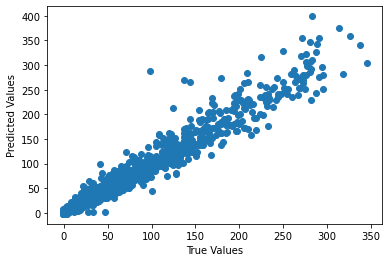

In [50]:
plt.scatter(predictions,y_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()